In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.shape

(13320, 9)

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df.area_type.nunique()

4

In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df1 = df.drop(['area_type', 'society','balcony', 'availability'], axis='columns')

In [11]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df1.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [13]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [15]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\shoab\AppData\Local\Temp\ipykernel_11416\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num('2166')

2166.0

In [27]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [28]:
convert_sqft_to_num('4125Perch')

In [29]:
df3 = df2.copy()

In [30]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [31]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [32]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [33]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [34]:
df4 = df3.copy()

In [35]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [36]:
df4['price_per_sqrt'] = df4['price']*100000/df4['total_sqft']

In [37]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [39]:
len(df4['location'].unique())

1304

In [40]:
df4.location = df4.location.apply(lambda x: x.strip())

In [41]:
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [46]:
location_stat = df4.groupby('location')['location'].agg('count')

In [47]:
location_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [48]:
location_stat.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [49]:
len(location_stat[location_stat <=10])

1052

In [51]:
location_threshold = len(location_stat[location_stat <=5])

In [54]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_threshold else x)

In [53]:
location_threshold = (location_stat[location_stat <=5])

In [55]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [56]:
len(df4.location.unique())

386

In [63]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Kundalahalli Colony,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Vishwanatha Nagenahalli,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [66]:
df5 = df4[~(df4.total_sqft/df4.bhk<200)]

In [67]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [68]:
df5.price_per_sqrt

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqrt, Length: 12906, dtype: float64

In [69]:
df5.price_per_sqrt.describe()

count     12860.000000
mean       6496.719070
std        4344.787424
min         267.829813
25%        4240.119848
50%        5357.142857
75%        7094.306991
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [72]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)

In [73]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block HRBR Layout,7 Bedroom,2400.0,7.0,355.00,7,14791.666667
1,1st Block HRBR Layout,3 Bedroom,600.0,3.0,90.00,3,15000.000000
2,1st Block HRBR Layout,3 Bedroom,600.0,3.0,125.00,3,20833.333333
3,1st Block HRBR Layout,3 Bedroom,600.0,4.0,125.00,3,20833.333333
4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
...,...,...,...,...,...,...,...
10448,other,1 BHK,1800.0,1.0,200.00,1,11111.111111
10449,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10450,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10451,other,3 BHK,1440.0,2.0,63.93,3,4439.583333


In [76]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

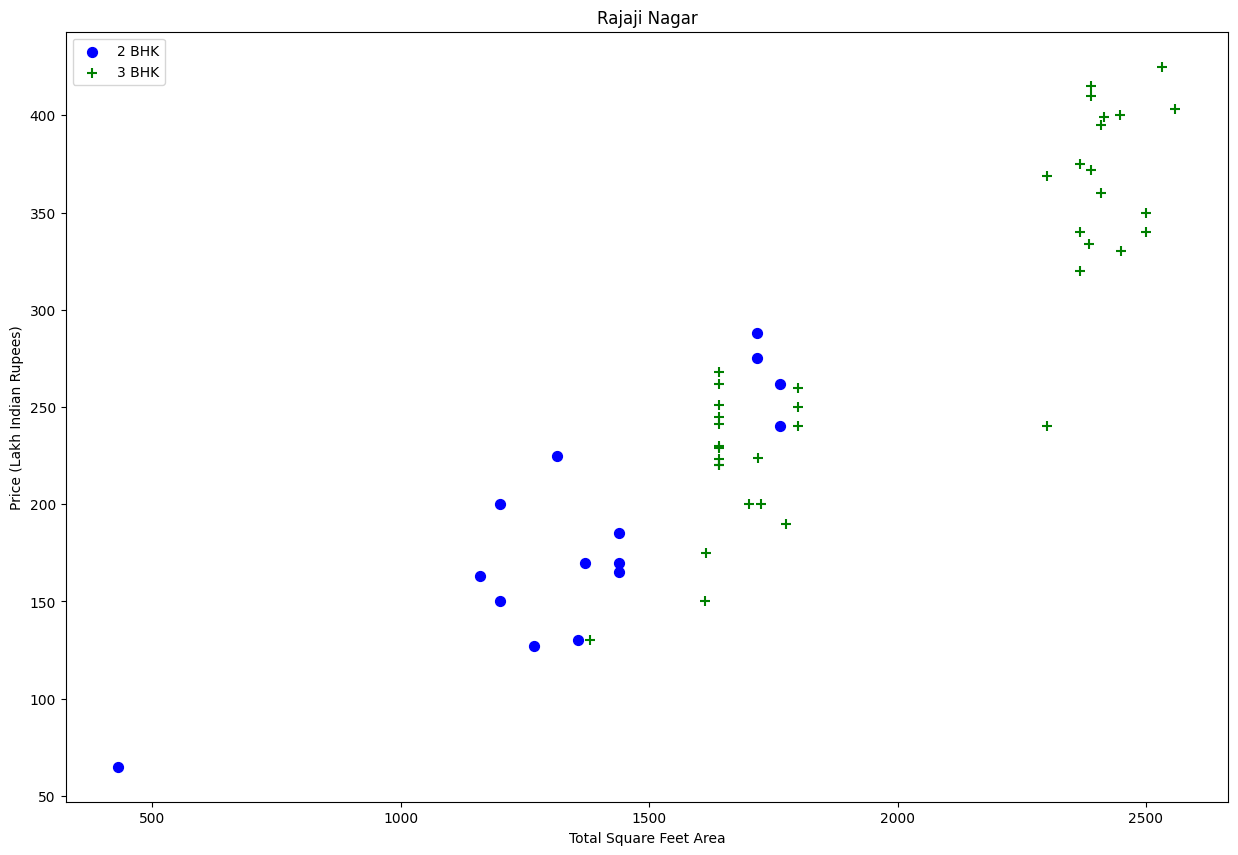

In [77]:
plot_scatter_chart(df6,"Rajaji Nagar")

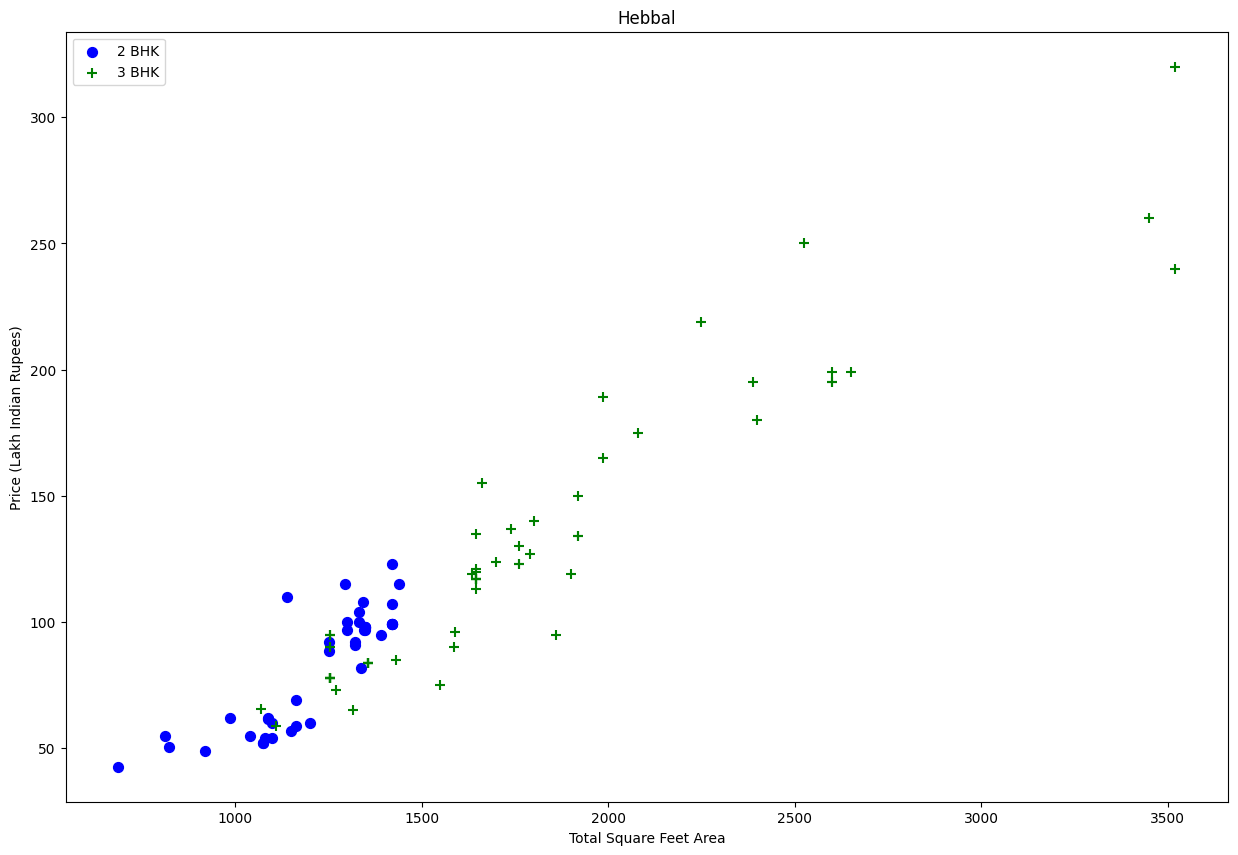

In [78]:
plot_scatter_chart(df6,"Hebbal")

In [81]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)


In [82]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block HRBR Layout,7 Bedroom,2400.0,7.0,355.0,7,14791.666667
1,1st Block HRBR Layout,3 Bedroom,600.0,3.0,90.0,3,15000.000000
2,1st Block HRBR Layout,3 Bedroom,600.0,3.0,125.0,3,20833.333333
3,1st Block HRBR Layout,3 Bedroom,600.0,4.0,125.0,3,20833.333333
4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
...,...,...,...,...,...,...,...
10445,other,2 BHK,1650.0,1.0,130.0,2,7878.787879
10447,other,6 Bedroom,1200.0,3.0,125.0,6,10416.666667
10448,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10449,other,2 BHK,1353.0,2.0,110.0,2,8130.081301


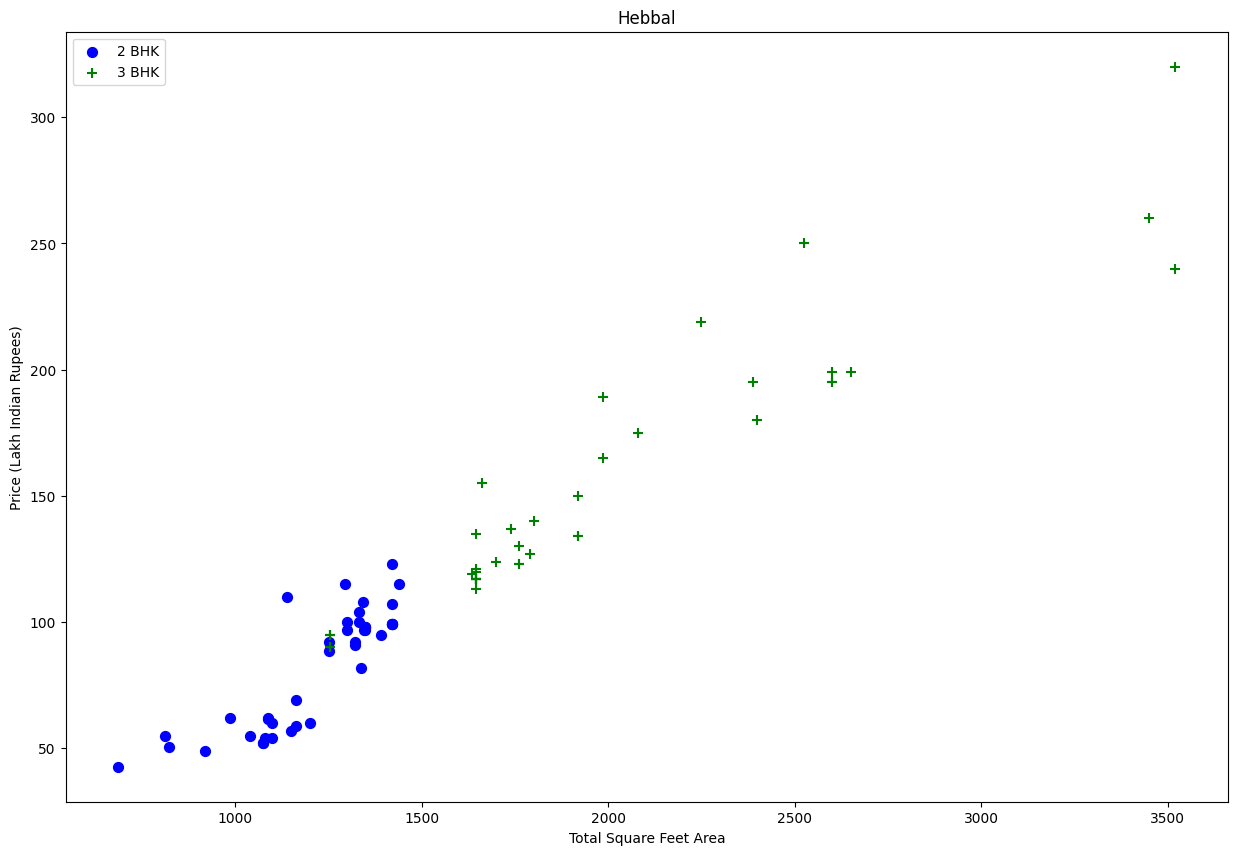

In [83]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

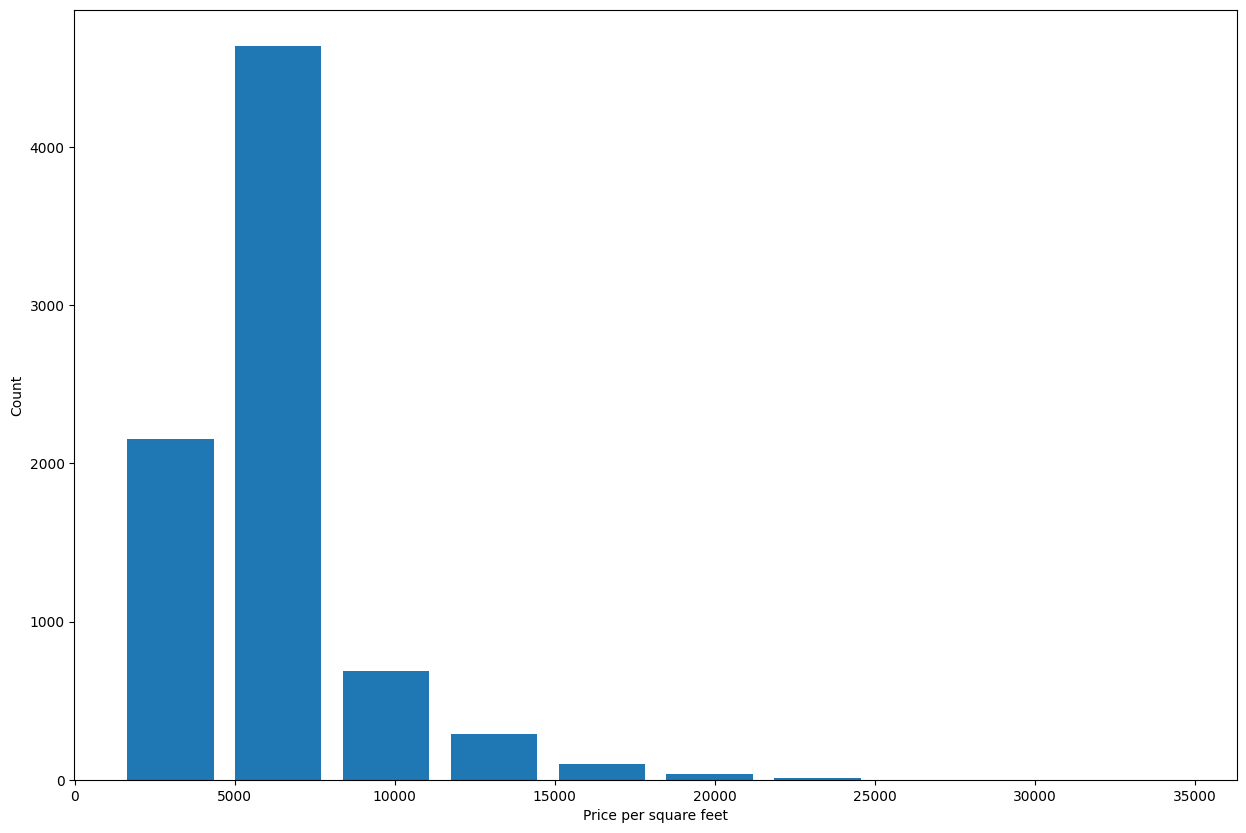

In [85]:
plt.hist(df7.price_per_sqrt, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [86]:
df7.bath.unique()

array([ 7.,  3.,  4.,  6.,  2.,  5.,  1.,  9.,  8., 14., 12., 10., 27.,
       16., 13.])

In [87]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
693,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5993,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8631,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
9154,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
9290,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9352,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9836,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10057,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

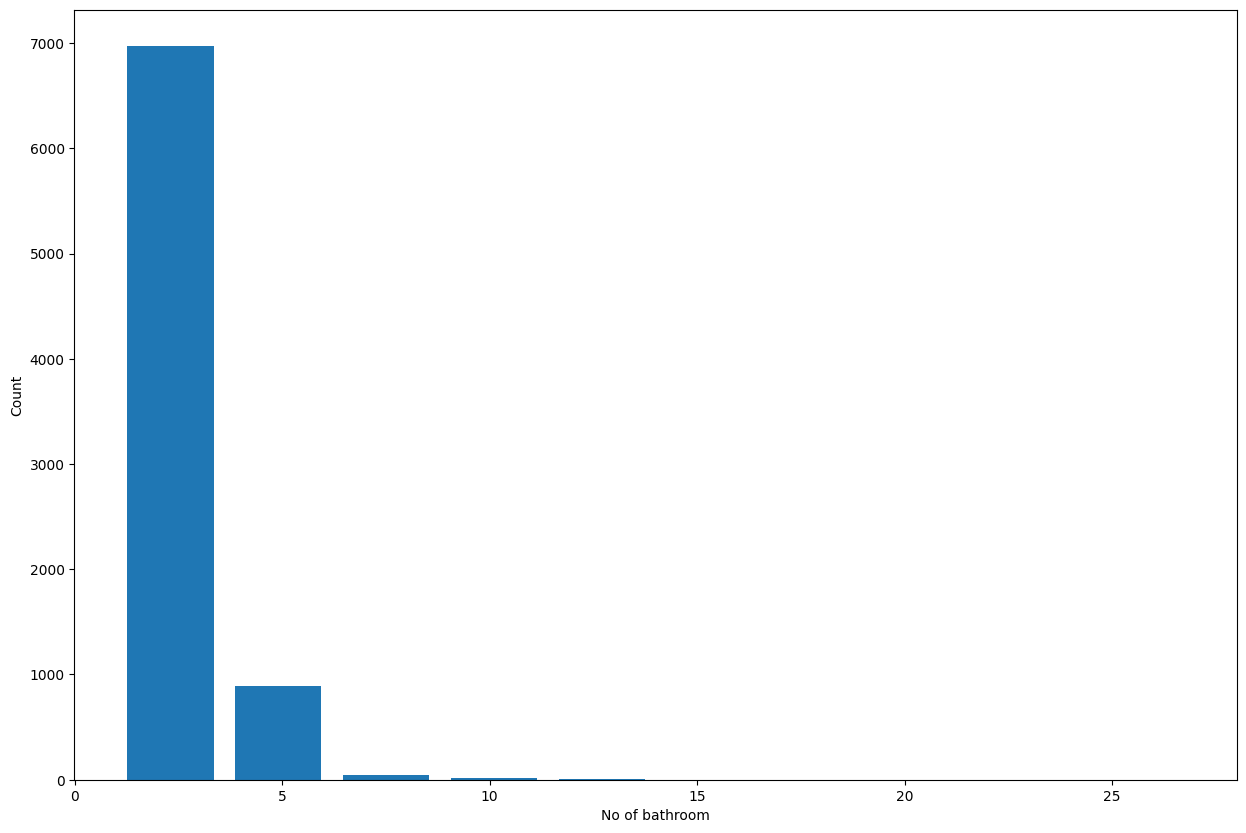

In [88]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("No of bathroom")
plt.ylabel("Count")

In [89]:
df7[df7.bath> df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
693,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1738,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1897,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5939,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7168,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7617,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8631,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8,16216.216216


In [90]:
df8 = df7[df7.bath< df7.bhk+2]

In [91]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block HRBR Layout,7 Bedroom,2400.0,7.0,355.0,7,14791.666667
1,1st Block HRBR Layout,3 Bedroom,600.0,3.0,90.0,3,15000.000000
2,1st Block HRBR Layout,3 Bedroom,600.0,3.0,125.0,3,20833.333333
3,1st Block HRBR Layout,3 Bedroom,600.0,4.0,125.0,3,20833.333333
4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
...,...,...,...,...,...,...,...
10445,other,2 BHK,1650.0,1.0,130.0,2,7878.787879
10447,other,6 Bedroom,1200.0,3.0,125.0,6,10416.666667
10448,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10449,other,2 BHK,1353.0,2.0,110.0,2,8130.081301


In [92]:
df9 = df8.drop(['size','price_per_sqrt'],axis='columns')

In [93]:
df9

,location,total_sqft,bath,price,bhk
0,1st Block HRBR Layout,2400.0,7.0,355.0,7
1,1st Block HRBR Layout,600.0,3.0,90.0,3
2,1st Block HRBR Layout,600.0,3.0,125.0,3
3,1st Block HRBR Layout,600.0,4.0,125.0,3
4,1st Block Jayanagar,2850.0,4.0,428.0,4
...,...,...,...,...,...
10445,other,1650.0,1.0,130.0,2
10447,other,1200.0,3.0,125.0,6
10448,other,1800.0,1.0,200.0,1
10449,other,1353.0,2.0,110.0,2


In [95]:
dummies = pd.get_dummies(df9.location)

In [96]:
dummies

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,3rd Block Hrbr Layout,4th Block Koramangala,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [99]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis = 'columns')

In [100]:
df10

,location,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1st Block HRBR Layout,2400.0,7.0,355.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block HRBR Layout,600.0,3.0,90.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block HRBR Layout,600.0,3.0,125.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block HRBR Layout,600.0,4.0,125.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2850.0,4.0,428.0,4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,other,1650.0,1.0,130.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10447,other,1200.0,3.0,125.0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10448,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10449,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
df10.drop('location', axis = 'columns', inplace=True)

In [102]:
df10

,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2400.0,7.0,355.0,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600.0,3.0,90.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600.0,3.0,125.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,600.0,4.0,125.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2850.0,4.0,428.0,4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,1650.0,1.0,130.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10447,1200.0,3.0,125.0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10448,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10449,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
x = df10.drop('price', axis = 'columns')
x

,total_sqft,bath,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2400.0,7.0,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,600.0,4.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2850.0,4.0,4,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,1650.0,1.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10447,1200.0,3.0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10448,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10449,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
y = df10.price

In [105]:
y

0        355.0
1         90.0
2        125.0
3        125.0
4        428.0
         ...  
10445    130.0
10447    125.0
10448    200.0
10449    110.0
10450     26.0
Name: price, Length: 7836, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [145]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [146]:
model.fit(x_train, y_train)

LinearRegression()

In [147]:
model.score(x_test, y_test)

0.7829570250130665

In [149]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80235183, 0.65975731, 0.86715686, 0.77227881, 0.81762643])

In [154]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
                'model': DecisionTreeRegressor(),
                'params': {
                    'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20]
            }
        },
            'naive_bayes': {
            'model': GaussianNB(),
            'params': {
                
            }
        },
        'svm': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': [1, 10, 100],
                'gamma': ['scale', 'auto']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'loss': ['ls', 'lad', 'huber'],
                'learning_rate': [0.1, 0.01],
                'n_estimators': [100, 200],
                'max_depth': [3, 5]
            }
        },
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter = 10000),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': [0.1, 1, 10]
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)